In [ ]:
!git clone https://github.com/justshivam/Cat-And-Dog-Prediction.git

In [ ]:
import subprocess
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

In [15]:
"""
Diferencia entre Localización de Objetos y Clasificación de Imágenes:

La localización de objetos se refiere a identificar y ubicar las regiones de interés en una imagen,
generalmente mediante la delimitación de cuadros delimitadores alrededor de los objetos detectados.

Por otro lado, la clasificación de imágenes implica asignar una etiqueta o
categoría a toda la imagen en función de su contenido.

"""

In [17]:
def get_prediction_info(image_path):
    # Run the prediction script
    result = subprocess.run(["python3", "Cat-And-Dog-Prediction/predict.py", image_path], capture_output=True, text=True)

    # Extract prediction information
    output_lines = result.stdout.split('\n')
    predicted_class = output_lines[-3].split(': ')[1]
    confidence = float(output_lines[-2].split(': ')[1])

    return predicted_class, confidence

def plot_image_with_predictions(cat_path, dog_path):
    # Get prediction information for cat image
    cat_predicted_class, cat_confidence = get_prediction_info(cat_path)

    # Get prediction information for dog image
    dog_predicted_class, dog_confidence = get_prediction_info(dog_path)

    # Load images
    cat_img = Image.open(cat_path)
    dog_img = Image.open(dog_path)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot cat image
    axes[0].imshow(cat_img)
    axes[0].axis('off')
    axes[0].set_title(f"Predicted Class: {cat_predicted_class}\nConfidence: {cat_confidence}")

    # Plot dog image
    axes[1].imshow(dog_img)
    axes[1].axis('off')
    axes[1].set_title(f"Predicted Class: {dog_predicted_class}\nConfidence: {dog_confidence}")

    plt.show()

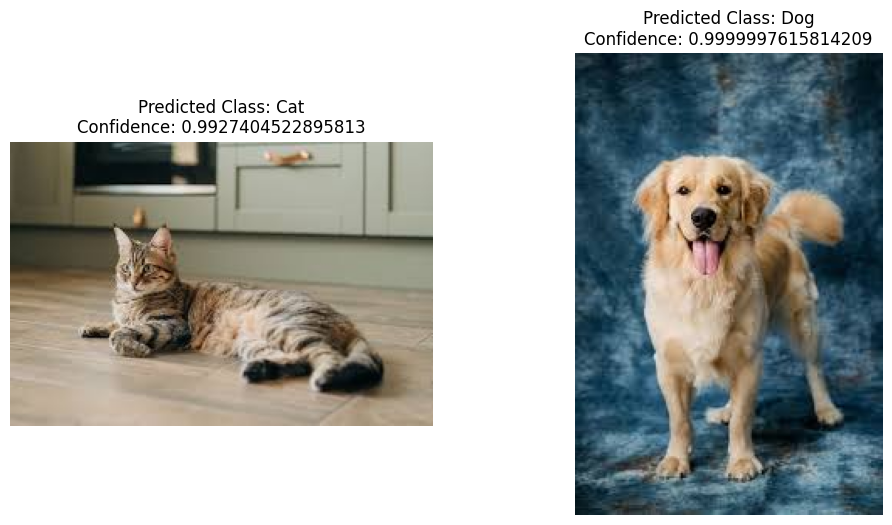

In [18]:
# Example usage:
plot_image_with_predictions("/content/cat.jpg", "/content/dog.jpg")

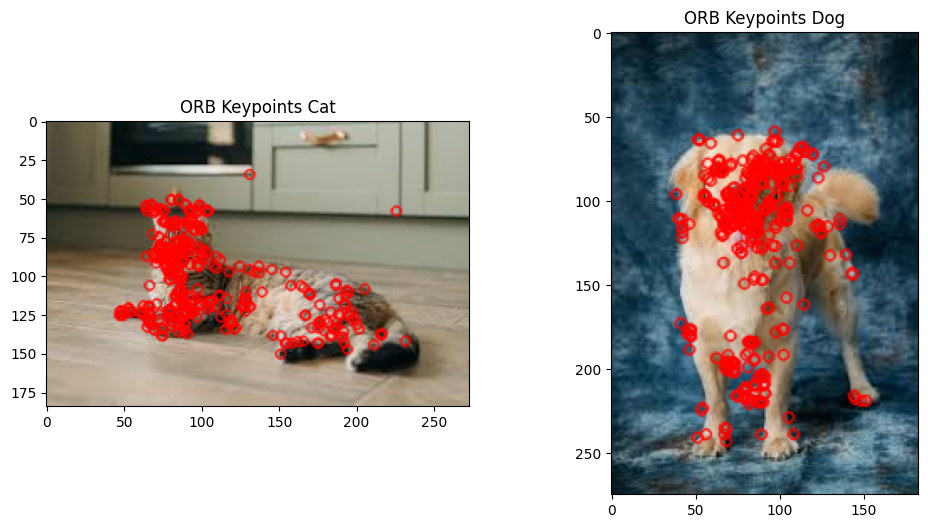

In [22]:
# Cargar la imagen
image_cat = cv2.imread('cat.jpg')
image_dog = cv2.imread('dog.jpg')

# Convertir la imagen a RGB
image_cat_rgb = cv2.cvtColor(image_cat, cv2.COLOR_BGR2RGB)
image_dog_rgb = cv2.cvtColor(image_dog, cv2.COLOR_BGR2RGB)

# Inicializar ORB
orb = cv2.ORB_create()
keypoints_orb = orb.detect(image_cat, None)
image_with_orb_keypoints_cat = cv2.drawKeypoints(image_cat_rgb, keypoints_orb, None, color=(255, 0, 0), flags=0)

orb = cv2.ORB_create()
keypoints_orb = orb.detect(image_dog, None)
image_with_orb_keypoints_dog = cv2.drawKeypoints(image_dog_rgb, keypoints_orb, None, color=(255, 0, 0), flags=0)

# Usar matplotlib para mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_with_orb_keypoints_cat)
plt.title('ORB Keypoints Cat')

plt.subplot(1, 2, 2)
plt.imshow(image_with_orb_keypoints_dog)
plt.title('ORB Keypoints Dog')

plt.show()